In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Expected Days to Ship,On-Time Status,Profit Margin,Days to Ship
0,33312,CA-2016-AM10705140-42632,19-09-2016,24-09-2016,Standard Class,AM-107051408,Anne McFarland,Consumer,36830,Auburn,...,900.08,4,0%,117.0104,53.84,Medium,5,On Time,13%,5
1,34744,CA-2017-KN16705140-42898,12-06-2017,16-06-2017,Standard Class,KN-167051408,Kristina Nunn,Home Office,36830,Auburn,...,3.76,2,0%,1.0904,1.45,High,3,Late,29%,4
2,38219,CA-2015-MS17710140-42079,16-03-2015,19-03-2015,Second Class,MS-177101408,Maurice Satty,Consumer,36830,Auburn,...,491.55,5,0%,240.8595,77.93,High,3,On Time,49%,3
3,40966,CA-2017-AH10465140-42828,03-04-2017,07-04-2017,Standard Class,AH-104651408,Amy Hunt,Consumer,35601,Decatur,...,14.94,3,0%,6.8724,1.54,High,3,Late,46%,4
4,39850,US-2017-CB12025140-43053,14-11-2017,21-11-2017,Standard Class,CB-120251408,Cassandra Brandow,Consumer,35601,Decatur,...,239.92,8,0%,23.9920,31.69,Low,7,On Time,10%,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 4998 non-null   int64         
 1   Order ID               4998 non-null   object        
 2   Order Date             4998 non-null   datetime64[ns]
 3   Ship Date              4998 non-null   datetime64[ns]
 4   Ship Mode              4998 non-null   object        
 5   Customer ID            4998 non-null   object        
 6   Customer Name          4998 non-null   object        
 7   Segment                4998 non-null   object        
 8   Postal Code            4998 non-null   int64         
 9   City                   4998 non-null   object        
 10  State                  4998 non-null   object        
 11  Country                4998 non-null   object        
 12  Region                 4998 non-null   object        
 13  Mar

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Profit,Shipping Cost,Expected Days to Ship,Days to Ship
count,4998.000000,4998,4998,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,36341.009604,2016-05-07 21:48:54.453781504,2016-05-11 20:50:07.923169280,55423.947579,358.747745,4.072229,44.024773,38.930102,4.245898,3.959184
min,31298.000000,2014-01-04 00:00:00,2014-01-08 00:00:00,1040.000000,0.556000,1.000000,-6599.978000,1.020000,2.000000,0.000000
25%,33848.500000,2015-05-30 06:00:00,2015-06-03 00:00:00,23464.000000,31.972000,2.000000,1.847100,2.882500,3.000000,3.000000
50%,36358.000000,2016-07-10 12:00:00,2016-07-14 00:00:00,60072.000000,119.920000,3.000000,12.901200,11.155000,5.000000,4.000000
75%,38874.750000,2017-05-20 00:00:00,2017-05-25 00:00:00,90008.000000,388.320000,5.000000,51.177525,39.662500,5.000000,5.000000
max,41290.000000,2017-12-31 00:00:00,2018-01-06 00:00:00,99301.000000,17499.950000,14.000000,8399.976000,933.570000,7.000000,8.000000
std,2884.937541,NaN,NaN,31984.401014,756.518882,2.329687,317.244956,78.143068,1.237852,1.737972


In [11]:
df.shape

(4998, 28)

In [13]:
df.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Postal Code              0
City                     0
State                    0
Country                  0
Region                   0
Market                   0
Product ID               0
Product Name             0
Sub-Category             0
Category                 0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0
Shipping Cost            0
Order Priority           0
Expected Days to Ship    0
On-Time Status           0
Profit Margin            0
Days to Ship             0
dtype: int64

In [5]:
df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date']= pd.to_datetime(df['Ship Date'],dayfirst=True)

df.dtypes

Row ID                            int64
Order ID                         object
Order Date               datetime64[ns]
Ship Date                datetime64[ns]
Ship Mode                        object
Customer ID                      object
Customer Name                    object
Segment                          object
Postal Code                       int64
City                             object
State                            object
Country                          object
Region                           object
Market                           object
Product ID                       object
Product Name                     object
Sub-Category                     object
Category                         object
Sales                           float64
Quantity                          int64
Discount                         object
Profit                          float64
Shipping Cost                   float64
Order Priority                   object
Expected Days to Ship             int64


In [17]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Profit,Shipping Cost,Order Priority,Expected Days to Ship,On-Time Status,Profit Margin,Days to Ship,Year,Month,Day
0,33312,CA-2016-AM10705140-42632,2016-09-19,2016-09-24,Standard Class,AM-107051408,Anne McFarland,Consumer,36830,Auburn,...,117.0104,53.84,Medium,5,On Time,13%,5,2016,9,19
1,34744,CA-2017-KN16705140-42898,2017-06-12,2017-06-16,Standard Class,KN-167051408,Kristina Nunn,Home Office,36830,Auburn,...,1.0904,1.45,High,3,Late,29%,4,2017,6,12
2,38219,CA-2015-MS17710140-42079,2015-03-16,2015-03-19,Second Class,MS-177101408,Maurice Satty,Consumer,36830,Auburn,...,240.8595,77.93,High,3,On Time,49%,3,2015,3,16
3,40966,CA-2017-AH10465140-42828,2017-04-03,2017-04-07,Standard Class,AH-104651408,Amy Hunt,Consumer,35601,Decatur,...,6.8724,1.54,High,3,Late,46%,4,2017,4,3
4,39850,US-2017-CB12025140-43053,2017-11-14,2017-11-21,Standard Class,CB-120251408,Cassandra Brandow,Consumer,35601,Decatur,...,23.9920,31.69,Low,7,On Time,10%,7,2017,11,14


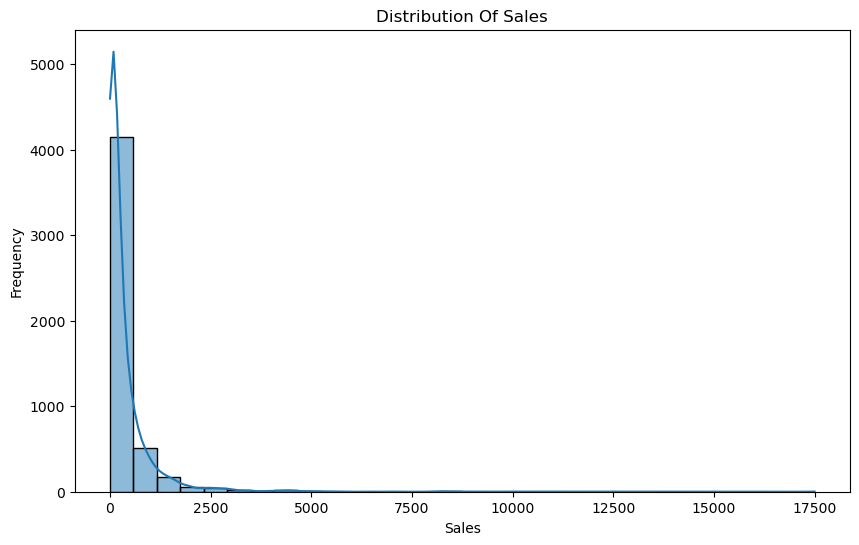

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'],bins=30, kde=True)
plt.title('Distribution Of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [41]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Expected Days to Ship',
       'On-Time Status', 'Profit Margin', 'Days to Ship', 'Year', 'Month',
       'Day'],
      dtype='object')


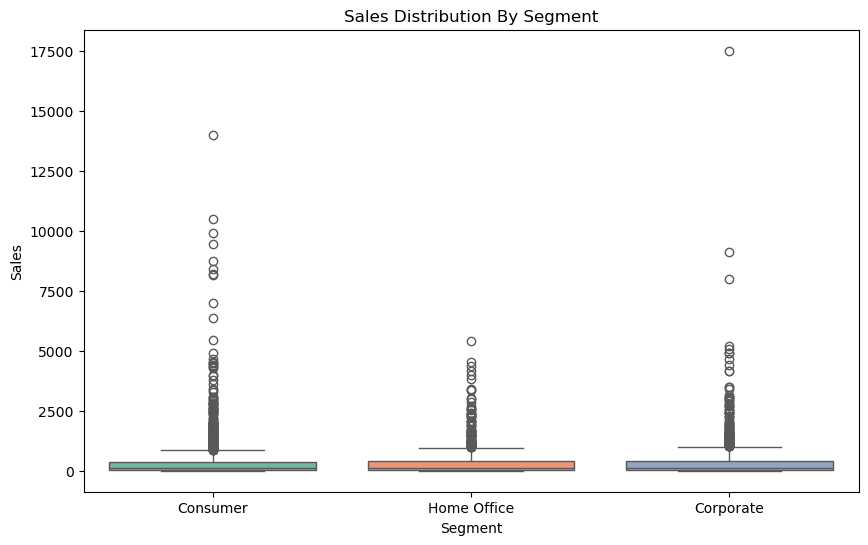

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Segment', y='Sales', hue = 'Segment', palette='Set2', legend=False)
plt.title('Sales Distribution By Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()
                                             

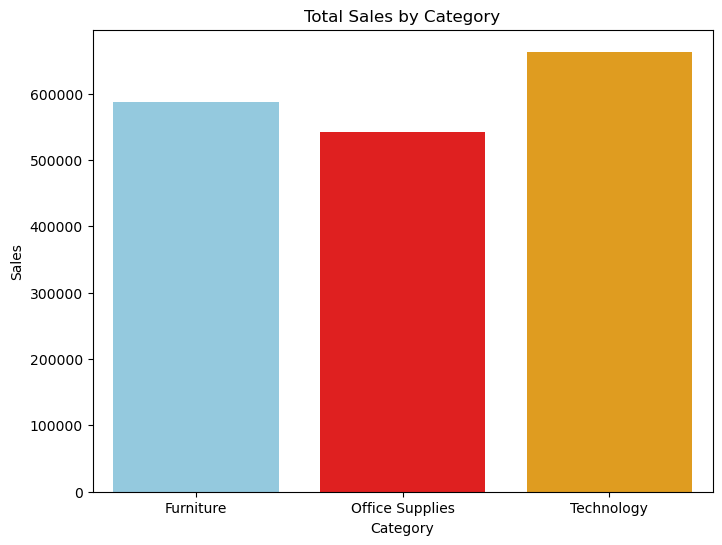

In [123]:

salescategory = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=salescategory, x='Category', y='Sales', palette=['skyblue', 'red', 'orange'], hue='Category', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()